In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [16]:
df = pd.read_csv("../data/TeleAntiFraud/distilbert_sentiment_analysis.csv")
df = df[['sentiment_neg', 'sentiment_pos', 'text_length', 'target']]
df.head()

,sentiment_neg,sentiment_pos,text_length,target
0,0.446601,0.553399,828,0
1,0.945283,0.054717,879,0
2,0.014362,0.985638,776,1
3,0.949376,0.050624,846,1
4,0.002714,0.997286,943,1


In [27]:
df['target'].value_counts()/len(df)*100

target
0    60.705459
1    39.294541
Name: count, dtype: float64

In [17]:
y = df['target']
X = df.drop('target', axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  
)

In [19]:
ct = make_column_transformer(
    (StandardScaler(), ['sentiment_neg', 'sentiment_pos', 'text_length']),
    remainder='passthrough'
)

pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [31]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1081
           1       0.77      0.88      0.82       700

    accuracy                           0.85      1781
   macro avg       0.84      0.86      0.85      1781
weighted avg       0.86      0.85      0.85      1781



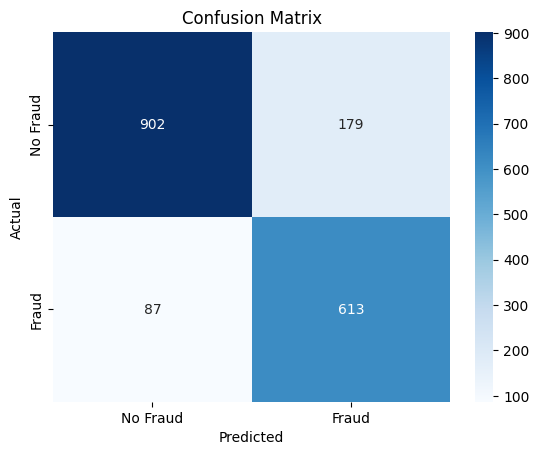

In [30]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
y_pred_proba = pipeline.predict_proba(X_test)

y_pred_proba[:, 1]

array([0.99, 0.82, 0.  , ..., 0.  , 0.72, 0.5 ])

PR-AUC (Average Precision): 0.811


Text(0.5, 1.0, 'Precision-Recall Curve')

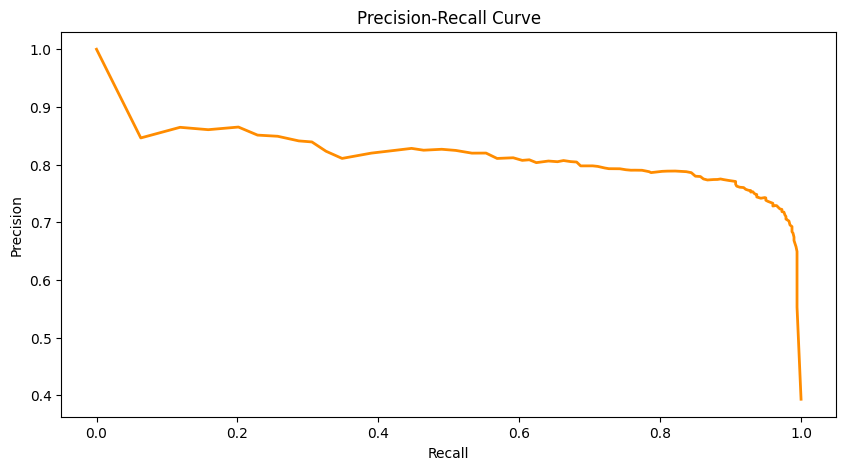

In [35]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
pr_auc = average_precision_score(y_test, y_pred_proba[:, 1])

print(f"PR-AUC (Average Precision): {pr_auc:.3f}")
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

print(f"ROC-AUC: {roc_auc:.3f}")

ROC-AUC: 0.912


1. Optimize for recall